BDA601- BIG DATA AND ANALYTICS ASSESSMENT 2  by Sabrina Fu - A00038371
sabrina.fu@business.torrens.edu.au

*****NOTE: Completed via Google Colab, online storage such as Github, Google Drive have been used to save and retireve the CSV files******

#A. Problem Statement

Customer churn is a term to describe when the customers quit from their existing service provider and switch to another. It is obvious that the loss of customers base to a competitor is one of the major challenges that every business may face in the current environment.

The purpose of this customer churn prediction model is to provide the important insights and provide adequate explanations of the data preparation, data mining principles and techniques in use. It also aims to demostrate, visualise the outcomes via findings such as trends pattern, correlations and the likelihood of churning based on the analysis of the Kaggle Telco churn dataset example in aim to help the business to better prepare and implement early intervension strategy in response to customer churning.

#B. Exploratory Data Analysis

Dataset Structures: The Kaggle Telco Churn dataset contains 21 attributes of
approximately 7,043 telecommunication customers. Exploratory data analysis assist to discover the trends, patterns and relationships between the variables. Useful python libraries may include Matplotlib, Seaborn, Pandas to analysis and visualise the distribution of the individual variables, the co-relations and if there's any presence of outliers or anomalies that may adversely impact the model's performance.

load dataset and Preprocessing

<ipython-input-123-4be38b302476>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=data, palette='pastel')
<ipython-input-123-4be38b302476>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SeniorCitizen', data=data, palette='pastel')


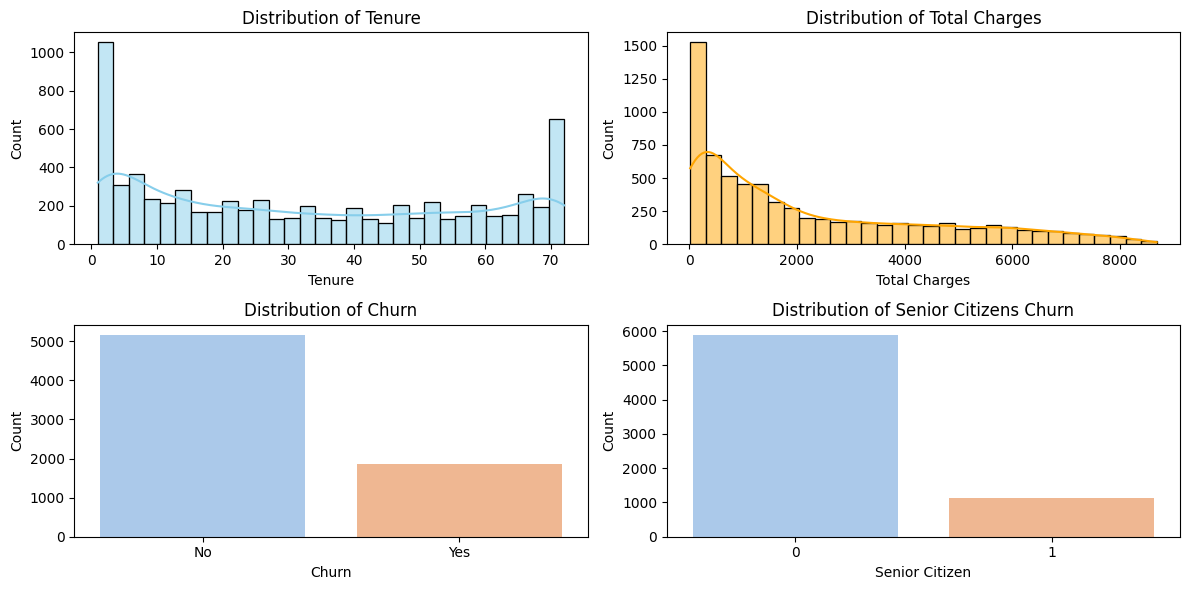

In [123]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
#file_path = 'path/to/csv/file.csv'
#df = pd.read_csv(file_path) *not using standard path in this instance due to online storage is used instead.

# URL for raw CSV data saved @ GitHub
url = 'https://raw.githubusercontent.com/kellsakf/BDA601-Assessment-2/main/Original_Telco-Customer-Churn.csv'

# Read the CSV, explicitly setting the delimiter (try comma first)
data = pd.read_csv(url, sep=',')

# Preprocess 'TotalCharges': Convert to numeric and handle errors by setting invalid parsing as NaN, then drop them
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dropna(subset=['TotalCharges'], inplace=True)

# Visualisations
plt.figure(figsize=(12, 6))

# TENURE HISTOGRAM
plt.subplot(2,2,1)
sns.histplot(data['tenure'], bins=30, kde=True, color='skyblue')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Distribution of Tenure')

# TOTALCHARGES HISTOGRAM
plt.subplot(2,2,2)
sns.histplot(data['TotalCharges'], bins=30, kde=True, color='orange')
plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.title('Distribution of Total Charges')

# CHURN COUNT PLOT
plt.subplot(2,2,3)
sns.countplot(x='Churn', data=data, palette='pastel')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Distribution of Churn')

# COUNT PLOT for SeniorCitizen
plt.subplot(2,2,4)
sns.countplot(x='SeniorCitizen', data=data, palette='pastel')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.title('Distribution of Senior Citizens Churn')

plt.tight_layout()
plt.show()


Correlation Matrix

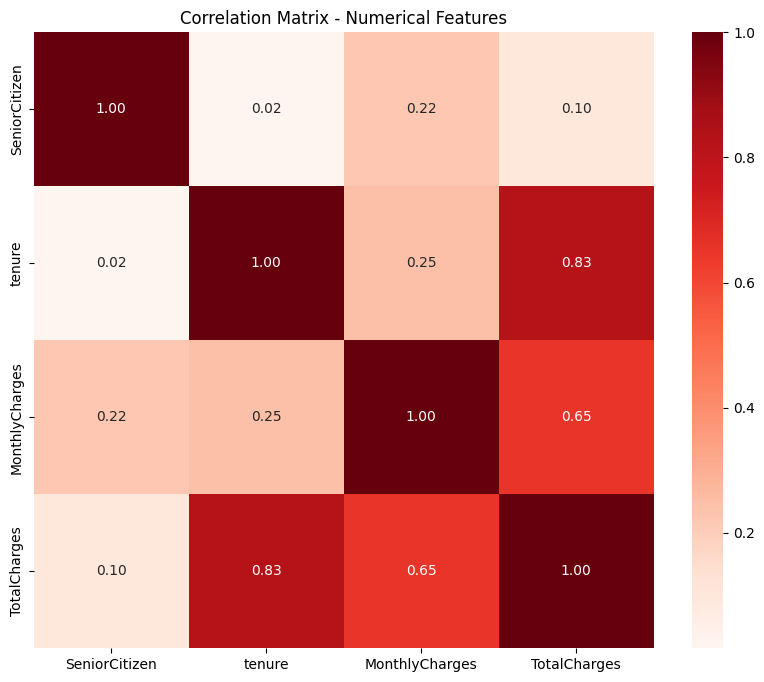

In [124]:
# Correlation Matrix for numerical features (excluding non-numeric data using select_dtypes)
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='Reds', fmt='.2f')
plt.title('Correlation Matrix - Numerical Features')
plt.show()

Box Plot for Tenure VS Churn

<ipython-input-125-3412c96103f8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=data, palette='pastel')


Text(0.5, 1.0, 'Box Plot - Tenure VS Churn')

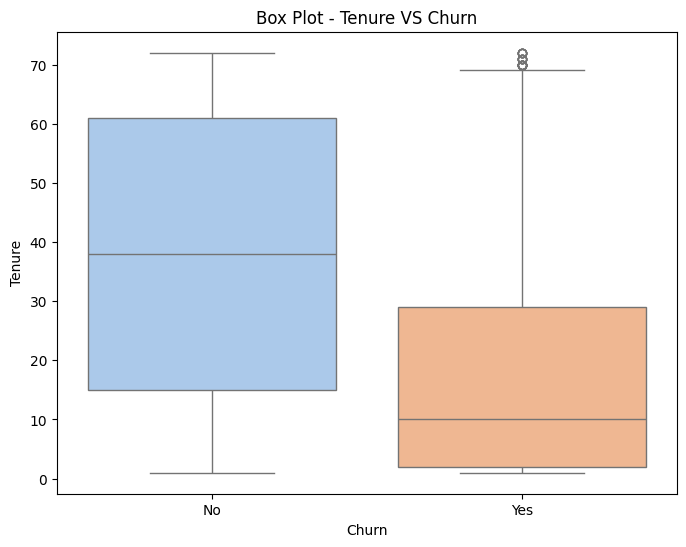

In [125]:
# Box Plot for 'Tenure' VS 'Churn'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=data, palette='pastel')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.title('Box Plot - Tenure VS Churn')

Scatter Plot for MonthlyCharge VS Churn


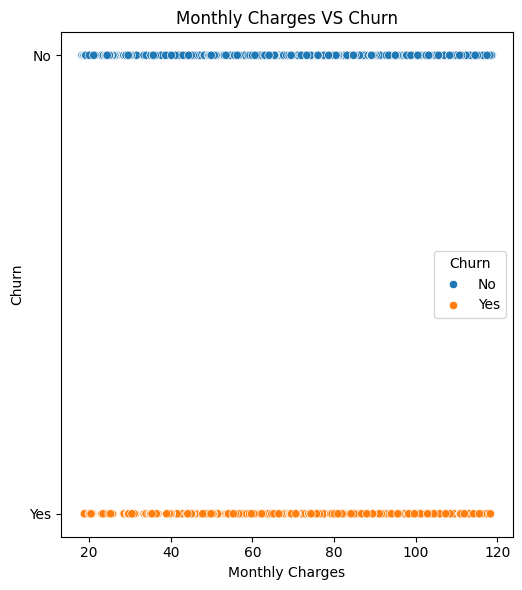

In [126]:
# Scatter plot for 'MonthlyCharges' vs 'Churn'
if 'MonthlyCharges' not in data.columns:  #checks if 'MonthlyCharges' is a column in the dataframe, if not, calculate by dividing'TotalCharges' by 'tenure'
    data['MonthlyCharges'] = data['TotalCharges'] / data['tenure'] + 1 #use 1 to avoid division by zero

plt.figure(figsize=(10, 6))
plt.subplot(1,2,2)
sns.scatterplot(x='MonthlyCharges', y='Churn', data=data, hue ='Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn')
plt.title('Monthly Charges VS Churn')
plt.tight_layout()
plt.show()

# C. Data Cleaning and Feature Selection

Steps already completed at preprocessing above


In [127]:
#steps already completed at preprocess section
# Preprocess 'TotalCharges': Convert to numeric and handle errors by setting invalid parsing as NaN, then drop them
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dropna(subset=['TotalCharges'], inplace=True)


Further cleaning

In [128]:
# Preprocess Convert 'Churn' column to binary (1 for 'Yes' 0 for 'No')
data['Churn'] = data['Churn'].replace({'Yes': 1, 'No': 0})

# Convert 'TotalCharges' column to numeric, coerce errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Drop rows with NaN values in 'TotalCharges'
data = data.dropna(subset=['TotalCharges'])

# Remove the specified attributes as per the instructions
data = data.drop(columns=['MonthlyCharges', 'OnlineSecurity', 'StreamingTV', 'InternetService', 'Partner'])

from google.colab import drive
# Mount Google Drive
drive.mount('/content/GoogleDrive')

# Specify the path to save the modified dataset
save_path= 'https://drive.google.com/drive/folders/1yGucPNDJmrwFYmj17UyJcA7P7ESMHvSX?usp=drive_link'
# Save the modified dataset
data.to_csv('Modified_Telco-Customer-Churn.csv', index=False)

from google.colab import files

# Download the modified CSV file  (keep the modified file)
files.download('Modified_Telco-Customer-Churn.csv')

Drive already mounted at /content/GoogleDrive; to attempt to forcibly remount, call drive.mount("/content/GoogleDrive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# D. Model Building

The following tools are common for the purpose of data modification, preparation, data analysis, AI training, AI prediction and visualisation.
Decision Tree Model Development include data preparation, data splitting into training and testing sets, Decision Classifier Creation, Model Fitting, Predictions Making, Model Evaluation and Visualisation of the Decision

In [129]:
from re import X
from sklearn.model_selection import train_test_split  #split data into training and testing sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder #feature scaling and encoding
from sklearn.compose import ColumnTransformer  #apply transformations to different columns
from sklearn.pipeline import Pipeline #apply a list of transforms and a final estimator
from sklearn.ensemble import RandomForestClassifier  #ML model learning for this case
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  #evaluation functions
# Define features and target
X = data.drop(['Churn', 'customerID'], axis=1) #all independent variables are features
y = data['Churn']  #Target - dependent variable indicating whether the customer has churned or not

# Split Data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  #test sample: 20% of the data

# Define numeric and categorical features
numeric_features = ['tenure', 'TotalCharges']
numeric_transformer = StandardScaler()  #use StandardScaler to standarize the numeric features by removing the mean and scaling to unit variance.

categorical_features = ['SeniorCitizen', 'gender', 'PhoneService', 'MultipleLines', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod']  # Include all categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Initialise the RandomForestClassifier model
model = RandomForestClassifier(random_state=42) # Initialize the model

# Fit the model to the preprocessed training data & Model training
model.fit(preprocessor.fit_transform(X_train), y_train) # model should be fit after applying transformations

#model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(preprocessor.transform(X_test))

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7668798862828714
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1033
           1       0.57      0.48      0.52       374

    accuracy                           0.77      1407
   macro avg       0.70      0.67      0.68      1407
weighted avg       0.76      0.77      0.76      1407

[[901 132]
 [196 178]]


# E. Conclusion

Recall = the ratio of the correctly predicted Positive 0.87 means that 87% of the actual class 0 were correctly predicted, for class 1, 0.44 means that 44% of the actual class 1 were correctly predicted

Precision = the ratio of the correctly predicted positive to the total predicted positives

Support = the acutal number of occurrence of the class in the dataset

F1 Score = the weight average of Precision and Recall. This takes into account of the both False Positives and False Negatives.

The Accuracy rate is 76.69% which is good